# Results Data Cleanup

## Setup

In [1]:
%load_ext lab_black

In [2]:
import os
import re
import sys
import glob
import numpy as np
import pandas as pd

from pyhere import here
from scipy.stats import pearsonr
from sklearn.metrics import r2_score


sys.path.append(str(here("code", "3_task_modeling")))

import task_modeling_utils

In [3]:
def get_group_R2(df, observed="demean_log_yield", predicted="demean_oos_prediction"):
    return r2_score(df[observed], df[predicted])


def get_group_r2(df, observed="demean_log_yield", predicted="demean_oos_prediction"):
    return pearsonr(df[observed], df[predicted])[0]


def extract_float_from_string(s):
    if isinstance(s, str):
        match = re.search(r"\((.*),\)", s)
        return float(match.group(1)) if match else s
    else:
        return s

## Benchmark - NDVI and Climate

### Maize Yield Levels

In [45]:
climate = pd.read_csv(here("data", "results", "climate_model_10-splits_2023-07-01.csv"))
climate

,split,random_state,variables,year_start,hot_encode,anomaly,total_n,train_n,test_n,best_reg_param,...,train_r2,test_R2,test_r,test_r2,demean_cv_R2,demean_cv_r,demean_cv_r2,demean_test_R2,demean_test_r,demean_test_r2
0,5,256787,pre,2016,False,True,432,345,87,[1.0],...,0.134416,0.032145,0.248466,0.061735,NaN,NaN,NaN,NaN,NaN,NaN
1,2,26225,ndvi,2016,False,False,432,345,87,[1.0],...,0.298732,0.280495,0.543013,0.294863,0.160512,0.419944,0.176353,0.142725,0.429317,0.184313
2,7,146316,tmp,2016,False,True,432,345,87,[0.01],...,0.508012,0.221544,0.552918,0.305719,NaN,NaN,NaN,NaN,NaN,NaN
3,9,107473,ndvi,2016,False,False,432,345,87,[1.0],...,0.271039,0.359287,0.633322,0.401097,0.099584,0.317997,0.101122,0.289646,0.704193,0.495887
4,6,234053,pre,2016,False,False,432,345,87,[0.1],...,0.376110,0.416826,0.659583,0.435050,-0.293145,-0.128651,0.016551,-0.076742,-0.035160,0.001236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,9,107473,pre_tmp_ndvi,2016,True,False,432,345,87,"[0.01, 0.01, 0.1, 0.01]",...,0.901790,0.848344,0.921572,0.849295,0.037644,0.395100,0.156104,0.669535,0.849986,0.722476
206,0,670487,pre_tmp_ndvi,2016,True,False,432,345,87,"[0.01, 0.001, 0.1, 1.0000000000000003e-09]",...,0.908803,0.850027,0.927722,0.860669,0.099652,0.443038,0.196283,0.719605,0.869136,0.755397
207,6,234053,pre_tmp_ndvi,2016,True,False,432,345,87,"[0.1, 0.01, 0.01, 0.01]",...,0.918986,0.811822,0.910348,0.828734,0.248059,0.554968,0.307989,0.647492,0.810820,0.657429
208,5,256787,pre_tmp_ndvi,2016,True,False,432,345,87,"[0.01, 0.01, 0.001, 0.01]",...,0.914262,0.865797,0.931245,0.867218,0.248752,0.545356,0.297414,-0.323479,0.169609,0.028767


In [48]:
climate_model_selection_group_cols = [
    "variables",
    "year_start",
    "hot_encode",
    "anomaly",
]

climate_results_summary = climate.groupby(
    climate_model_selection_group_cols, as_index=False
).agg(
    {
        "val_R2": "mean",
        "val_r2": "mean",
        "test_R2": "mean",
        "test_r2": "mean",
    }
)
climate_results_summary = climate_results_summary.sort_values("val_R2", ascending=False)

climate_results_summary

,variables,year_start,hot_encode,anomaly,val_R2,val_r2,test_R2,test_r2
20,tmp_ndvi,2016,True,False,0.816014,0.817164,0.834273,0.840106
14,pre_tmp_ndvi,2016,True,False,0.814329,0.815517,0.831528,0.837293
8,pre_ndvi,2016,True,False,0.791151,0.793534,0.814642,0.823237
2,ndvi,2016,True,False,0.784346,0.785885,0.803543,0.813590
11,pre_tmp,2016,True,False,0.783024,0.783442,0.802267,0.807989
17,tmp,2016,True,False,0.781171,0.782807,0.806596,0.813300
12,pre_tmp_ndvi,2016,False,False,0.708435,0.708780,0.708250,0.714890
9,pre_tmp,2016,False,False,0.686331,0.686476,0.683913,0.689825
18,tmp_ndvi,2016,False,False,0.666565,0.667003,0.673338,0.679725
5,pre,2016,True,False,0.664579,0.672051,0.699431,0.717199


### Demeaned Predictions

In [18]:
oos_climate_preds = pd.read_csv(
    here("data", "results", "climate_model_oos_predictions_10-splits_2023-07-01.csv")
)
oos_climate_preds

,data_fold,year,district,yield_mt,log_yield,oos_prediction,val_fold,demean_log_yield,demean_oos_prediction,split,random_state,variables,anomaly,hot_encode,year_start
0,train,2018,Katete,0.943240,0.288526,-0.005687,1,-0.102584,-0.003152,5,256787,pre,True,False,2016
1,train,2019,Chipata,1.786837,0.445112,-0.003269,1,-0.053057,-0.001964,5,256787,pre,True,False,2016
2,train,2020,Isoka,2.936742,0.595137,-0.015694,1,-0.049253,-0.014394,5,256787,pre,True,False,2016
3,train,2017,Namwala,1.045824,0.310868,-0.004583,1,-0.003890,-0.003599,5,256787,pre,True,False,2016
4,train,2016,Sesheke,0.519042,0.181570,0.004959,1,-0.000794,0.007458,5,256787,pre,True,False,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90715,test,2017,Namwala,1.045824,0.310868,0.276227,6,-0.029932,0.001618,1,116739,pre_tmp_ndvi,False,True,2016
90716,test,2016,Milenge,2.586672,0.554692,0.587593,6,0.000000,0.000000,1,116739,pre_tmp_ndvi,False,True,2016
90717,test,2018,Katete,0.943240,0.288526,0.390343,6,-0.085649,-0.068314,1,116739,pre_tmp_ndvi,False,True,2016
90718,test,2017,Chinsali,3.822585,0.683280,0.588593,6,0.000000,0.000000,1,116739,pre_tmp_ndvi,False,True,2016


In [59]:
oos_prediction_demean_groups = [
    # "data_fold",
    "district",
    # "val_fold",
    "split",
    "random_state",
    "variables",
    "anomaly",
    "hot_encode",
    "year_start",
]
oos_prediction = task_modeling_utils.demean_by_group(
    df=oos_climate_preds,
    observed="log_yield",
    predicted="oos_prediction",
    group=oos_prediction_demean_groups,
)
oos_prediction

,data_fold,year,district,yield_mt,log_yield,oos_prediction,val_fold,demean_log_yield,demean_oos_prediction,split,random_state,variables,anomaly,hot_encode,year_start
0,train,2018,Katete,0.943240,0.288526,-0.005687,1,-0.102584,-0.003152,5,256787,pre,True,False,2016
1,train,2019,Chipata,1.786837,0.445112,-0.003269,1,-0.047488,-0.001874,5,256787,pre,True,False,2016
2,train,2020,Isoka,2.936742,0.595137,-0.015694,1,-0.045885,-0.012653,5,256787,pre,True,False,2016
3,train,2017,Namwala,1.045824,0.310868,-0.004583,1,0.034735,-0.001758,5,256787,pre,True,False,2016
4,train,2016,Sesheke,0.519042,0.181570,0.004959,1,0.000325,0.007972,5,256787,pre,True,False,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90715,test,2017,Namwala,1.045824,0.310868,0.276227,6,0.034735,0.027372,1,116739,pre_tmp_ndvi,False,True,2016
90716,test,2016,Milenge,2.586672,0.554692,0.587593,6,-0.027734,-0.001815,1,116739,pre_tmp_ndvi,False,True,2016
90717,test,2018,Katete,0.943240,0.288526,0.390343,6,-0.102584,-0.030844,1,116739,pre_tmp_ndvi,False,True,2016
90718,test,2017,Chinsali,3.822585,0.683280,0.588593,6,0.066722,-0.016294,1,116739,pre_tmp_ndvi,False,True,2016


In [60]:
oos_prediction_r2_groups = [
    "data_fold",
    "split",
    "random_state",
    "variables",
    "anomaly",
    "hot_encode",
]

oos_prediction_R2 = oos_prediction.groupby(
    oos_prediction_r2_groups, as_index=False
).apply(get_group_R2)
oos_prediction_R2.rename(columns={None: "demean_R2"}, inplace=True)

oos_prediction_r2 = oos_prediction.groupby(
    oos_prediction_r2_groups, as_index=False
).apply(get_group_r2)
oos_prediction_r2.rename(columns={None: "demean_r"}, inplace=True)

oos_prediction_r2["demean_r2"] = oos_prediction_r2["demean_r"] ** 2

oos_prediction_summary = (
    oos_prediction_R2.set_index(oos_prediction_r2_groups)
    .join(oos_prediction_r2.set_index(oos_prediction_r2_groups))
    .reset_index()
)

oos_prediction_summary.sort_values(["variables", "data_fold"])

,data_fold,split,random_state,variables,anomaly,hot_encode,demean_R2,demean_r,demean_r2
0,test,0,670487,ndvi,False,False,0.242517,0.583012,0.339903
1,test,0,670487,ndvi,False,True,0.523082,0.728788,0.531132
2,test,0,670487,ndvi,True,False,0.395324,0.755978,0.571503
21,test,1,116739,ndvi,False,False,0.187596,0.463746,0.215061
22,test,1,116739,ndvi,False,True,0.383941,0.619950,0.384338
...,...,...,...,...,...,...,...,...,...
397,train,8,772246,tmp_ndvi,False,True,0.233796,0.523174,0.273711
398,train,8,772246,tmp_ndvi,True,False,0.384575,0.731912,0.535696
417,train,9,107473,tmp_ndvi,False,False,0.263307,0.520817,0.271251
418,train,9,107473,tmp_ndvi,False,True,0.101367,0.418901,0.175478


In [61]:
oos_prediction_summary_r2_groups = [
    "data_fold",
    "anomaly",
    "hot_encode",
    "variables",
]
oos_prediction_summary = (
    oos_prediction_summary.groupby(oos_prediction_summary_r2_groups, as_index=False)
    .agg(
        {
            "demean_R2": "mean",
            "demean_r2": "mean",
            # "demean_R2": "sem",
            # "demean_r2": "sem",
        }
    )
    .sort_values("variables")
)
# oos_prediction_summary  # .sort_values(["variables", "data_fold"])

In [62]:
# Pivot the DataFrame
oos_prediction_summary = oos_prediction_summary.pivot_table(
    index=[
        "anomaly",
        "hot_encode",
        "variables",
    ],
    columns="data_fold",
)

# Flatten the MultiIndex columns
oos_prediction_summary.columns = [
    "_".join(col) for col in oos_prediction_summary.columns
]

# Reset the index
oos_prediction_summary = oos_prediction_summary.reset_index()
oos_prediction_summary = oos_prediction_summary.set_index(
    [
        "variables",
        "demean_R2_train",
        "demean_r2_train",
        "demean_R2_test",
        "demean_r2_test",
    ]
)
oos_prediction_summary = oos_prediction_summary.reset_index()
oos_prediction_summary.sort_values("demean_R2_train", ascending=False)

,variables,demean_R2_train,demean_r2_train,demean_R2_test,demean_r2_test,anomaly,hot_encode
20,tmp_ndvi,0.383152,0.533858,0.346411,0.501778,True,False
18,pre_tmp_ndvi,0.381809,0.533668,0.341766,0.496883,True,False
16,pre_ndvi,0.347429,0.466751,0.298045,0.425642,True,False
6,tmp_ndvi,0.345354,0.358608,0.303760,0.351089,False,False
14,ndvi,0.331087,0.446705,0.285741,0.409955,True,False
4,pre_tmp_ndvi,0.312354,0.349253,0.250859,0.327825,False,False
17,pre_tmp,0.307404,0.431202,0.269079,0.401332,True,False
19,tmp,0.300890,0.421310,0.273436,0.409437,True,False
5,tmp,0.292263,0.300921,0.247612,0.304919,False,False
3,pre_tmp,0.278372,0.311486,0.239708,0.312588,False,False


In [63]:
oos_prediction_summary.loc[
    (oos_prediction_summary["anomaly"] == False)
    & (oos_prediction_summary["hot_encode"] == True)
].sort_values("demean_R2_train", ascending=False)

,variables,demean_R2_train,demean_r2_train,demean_R2_test,demean_r2_test,anomaly,hot_encode
13,tmp_ndvi,0.197669,0.258785,0.420736,0.439663,False,True
11,pre_tmp_ndvi,0.191580,0.255913,0.410397,0.432620,False,True
9,pre_ndvi,0.097646,0.188250,0.361064,0.383493,False,True
7,ndvi,0.068613,0.155010,0.330967,0.354489,False,True
10,pre_tmp,0.054820,0.151487,0.294041,0.337741,False,True
12,tmp,0.043652,0.147943,0.313483,0.355526,False,True
8,pre,-0.472177,0.051304,0.006286,0.080190,False,True


## Global Experiment - General Model

### Model Selection

In [5]:
model_selection_file_pattern = str(
    here("data", "results", "2_sensor_10-splits_*_anom-False.csv")
)
model_selection_files = glob.glob(pathname=model_selection_file_pattern)
sorted(model_selection_files)

['/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-05-11_1_rcf_climate-False_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-05-11_2_rcf_climate-False_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-05-11_3_rcf_climate-False_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-05-11_4_rcf_climate-False_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-05-11_5_rcf_climate-False_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-05-11_6_rcf_climate-False_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-05-11_7_rcf_climate-False_anom-False.csv',
 '/home/cmolitor/cro

In [6]:
model_selection_results = task_modeling_utils.merge_files(model_selection_files)
model_selection_results["anomaly"] = False
model_selection_results["variables"] = "rcf"
model_selection_results

,split,random_state,country,year_range,satellite_1,bands_1,num_features_1,points_1,month_range_1,limit_months_1,...,test_r,test_r2,demean_cv_R2,demean_cv_r,demean_cv_r2,demean_test_R2,demean_test_r,demean_test_r2,anomaly,variables
0,0,670487,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,1-12,False,...,0.875606,0.766687,0.117839,0.519227,0.269597,0.293401,0.561290,0.315046,False,rcf
1,1,116739,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,1-12,False,...,0.904602,0.818305,0.132072,0.494040,0.244076,0.511307,0.722383,0.521837,False,rcf
2,2,26225,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,1-12,False,...,0.932698,0.869926,0.125536,0.452668,0.204908,0.421614,0.668757,0.447236,False,rcf
3,3,777572,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,1-12,False,...,0.913001,0.833571,0.146011,0.523675,0.274235,0.131849,0.564733,0.318923,False,rcf
4,4,288389,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,1-12,False,...,0.919801,0.846033,-0.002118,0.398073,0.158462,0.610579,0.784178,0.614934,False,rcf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,5,256787,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.841214,0.707641,-0.131221,0.466321,0.217455,-0.016187,0.292059,0.085298,False,rcf
1136,6,234053,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.915579,0.838286,0.144304,0.480349,0.230735,0.399199,0.667107,0.445031,False,rcf
1137,7,146316,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.912913,0.833411,0.065448,0.436761,0.190760,0.366838,0.608689,0.370502,False,rcf
1138,8,772246,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.942299,0.887927,0.160958,0.485971,0.236168,0.513391,0.718095,0.515660,False,rcf


In [7]:
model_selection_group_cols = [
    "variables",
    "anomaly",
    "country",
    "year_range",
    "satellite_1",
    "bands_1",
    "num_features_1",
    "points_1",
    "month_range_1",
    "limit_months_1",
    "crop_mask_1",
    "weighted_avg_1",
    "satellite_2",
    "bands_2",
    "num_features_2",
    "points_2",
    "month_range_2",
    "limit_months_2",
    "crop_mask_2",
    "weighted_avg_2",
    "hot_encode",
]

model_selection_results_summary = model_selection_results.groupby(
    model_selection_group_cols, as_index=False
).agg(
    {
        "val_R2": "mean",
        "val_r2": "mean",
        "test_R2": "mean",
        "test_r2": "mean",
    }
)
model_selection_results_summary = model_selection_results_summary.sort_values(
    "val_R2", ascending=False
)

### Top Model Results 

In [8]:
top_model = model_selection_results_summary.iloc[0:1, :]
top_model_dict = top_model.to_dict(orient="records")[0]
top_model_dict

{'variables': 'rcf',
 'anomaly': False,
 'country': 'ZMB',
 'year_range': '2016-2021',
 'satellite_1': 'landsat-c2-l2',
 'bands_1': 'r-g-b-nir-swir16-swir22',
 'num_features_1': 1024,
 'points_1': 20,
 'month_range_1': '4-9',
 'limit_months_1': True,
 'crop_mask_1': True,
 'weighted_avg_1': False,
 'satellite_2': 'sentinel-2-l2a',
 'bands_2': '2-3-4-8',
 'num_features_2': 1000,
 'points_2': 15,
 'month_range_2': '1-12',
 'limit_months_2': False,
 'crop_mask_2': True,
 'weighted_avg_2': False,
 'hot_encode': True,
 'val_R2': 0.8002404610219435,
 'val_r2': 0.8017879820931079,
 'test_R2': 0.8258186120850981,
 'test_r2': 0.8325650503230417}

In [9]:
# Define the keys to remove
keys_to_remove = ["val_R2", "val_r2", "test_R2", "test_r2"]

# Remove keys
for key in keys_to_remove:
    if key in top_model_dict:
        del top_model_dict[key]

top_model_splits = model_selection_results.copy()

for key, value in top_model_dict.items():
    if key in model_selection_results.columns:
        top_model_splits = top_model_splits[top_model_splits[key] == value]
top_model_splits

,split,random_state,country,year_range,satellite_1,bands_1,num_features_1,points_1,month_range_1,limit_months_1,...,test_r,test_r2,demean_cv_R2,demean_cv_r,demean_cv_r2,demean_test_R2,demean_test_r,demean_test_r2,anomaly,variables
520,0,670487,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.940330,0.884220,0.156059,0.465797,0.216967,0.432052,0.677854,0.459487,False,rcf
521,1,116739,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.900153,0.810276,0.130357,0.466772,0.217876,0.656420,0.810435,0.656806,False,rcf
522,2,26225,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.874968,0.765569,0.035232,0.474167,0.224835,0.583502,0.764482,0.584432,False,rcf
523,3,777572,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.927930,0.861055,0.197228,0.518008,0.268332,0.475429,0.695419,0.483608,False,rcf
524,4,288389,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.906155,0.821116,0.256791,0.540645,0.292297,0.420944,0.681600,0.464579,False,rcf
525,5,256787,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.901840,0.813316,0.206182,0.512397,0.262551,0.299514,0.562121,0.315980,False,rcf
526,6,234053,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.918529,0.843696,0.223710,0.524803,0.275418,0.587511,0.772865,0.597321,False,rcf
527,7,146316,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.891916,0.795514,0.224398,0.512865,0.263031,0.045839,0.334379,0.111809,False,rcf
528,8,772246,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.931087,0.866924,0.133278,0.470515,0.221385,0.446182,0.667987,0.446207,False,rcf
529,9,107473,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,0.929497,0.863965,0.131317,0.459822,0.211436,0.574721,0.779260,0.607246,False,rcf


### Top Model Splits

In [10]:
top_model_file_pattern = str(
    here("data", "results", "2_sensor_top-mod_10-splits_*_*.csv")
)
top_model_files = glob.glob(pathname=top_model_file_pattern)
sorted(top_model_files)

['/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_top-mod_10-splits_2023-05-22_rcf_climate-True_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_top-mod_10-splits_2023-06-08_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_top-mod_10-splits_2023-06-08_rcf_climate-True_anom-True.csv']

In [11]:
top_model_results = task_modeling_utils.merge_files(top_model_files)
top_model_results["anomaly"] = top_model_results["demean_cv_R2"].isnull()
top_model_results["variables"] = top_model_results["variables"].fillna("rcf")

top_model_results["val_R2"] = top_model_results["val_R2"].apply(
    extract_float_from_string
)

top_model_results = pd.concat([top_model_results, top_model_splits])
top_model_results.head(10)

,split,random_state,variables,country,year_range,satellite_1,bands_1,num_features_1,points_1,month_range_1,...,test_R2,test_r,test_r2,demean_cv_R2,demean_cv_r,demean_cv_r2,demean_test_R2,demean_test_r,demean_test_r2,anomaly
0,0,670487,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.847675,0.938276,0.880362,0.209737,0.523837,0.274405,0.545070,0.738365,0.545183,False
1,1,116739,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.803469,0.900288,0.810518,0.131235,0.467381,0.218445,0.657664,0.811210,0.658062,False
2,2,26225,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.824435,0.908954,0.826197,0.144580,0.461305,0.212803,0.700661,0.860644,0.740707,False
3,3,777572,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.863111,0.929479,0.863932,0.204904,0.523020,0.273550,0.478438,0.697391,0.486354,False
4,4,288389,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.814105,0.908593,0.825542,0.309138,0.577654,0.333684,0.428592,0.690432,0.476696,False
5,5,256787,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.780335,0.884826,0.782917,0.086451,0.491176,0.241254,0.212076,0.469716,0.220633,False
6,6,234053,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.839898,0.919857,0.846137,0.281425,0.573529,0.328936,0.519446,0.742793,0.551741,False
7,7,146316,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.800192,0.895981,0.802781,0.260074,0.542605,0.294420,0.049373,0.348908,0.121737,False
8,8,772246,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.843533,0.927076,0.859469,0.168657,0.495024,0.245049,0.477862,0.691418,0.478059,False
9,9,107473,ndvi,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,...,0.868590,0.932461,0.869483,0.165132,0.484519,0.234759,0.606238,0.793241,0.629231,False


In [12]:
top_model_group_cols = [
    "variables",
    "anomaly",
]

top_model_results_summary = top_model_results.groupby(
    top_model_group_cols, as_index=False
).agg(
    {
        "val_R2": "mean",
        "val_r2": "mean",
        "test_R2": "mean",
        "test_r2": "mean",
        "demean_cv_R2": "mean",
        "demean_cv_r2": "mean",
        "demean_test_R2": "mean",
        "demean_test_r2": "mean",
        # "split": "count",
    }
)
top_model_results_summary = top_model_results_summary.sort_values(
    "val_R2", ascending=False
)
top_model_results_summary

,variables,anomaly,val_R2,val_r2,test_R2,test_r2,demean_cv_R2,demean_cv_r2,demean_test_R2,demean_test_r2
2,ndvi_tmp,False,0.817228,0.818720,0.838532,0.848717,0.233745,0.299423,0.482423,0.503770
0,ndvi,False,0.807060,0.808597,0.828534,0.836734,0.196133,0.265730,0.467542,0.490840
4,rcf,False,0.800240,0.801788,0.825819,0.832565,0.169455,0.245413,0.452211,0.472747
3,ndvi_tmp,True,0.557521,0.581597,0.532043,0.577524,NaN,NaN,NaN,NaN
1,ndvi,True,0.545656,0.571953,0.507439,0.568984,NaN,NaN,NaN,NaN
5,rcf,True,0.518647,0.555297,0.496935,0.561006,NaN,NaN,NaN,NaN


In [13]:
top_model_group_cols = [
    "variables",
    "anomaly",
]

top_model_results_summary = top_model_results.groupby(
    top_model_group_cols, as_index=False
).agg(
    {
        "val_R2": "sem",
        "val_r2": "sem",
        "test_R2": "sem",
        "test_r2": "sem",
        "split": "count",
    }
)
top_model_results_summary = top_model_results_summary.sort_values(
    "val_R2", ascending=False
)
top_model_results_summary

,variables,anomaly,val_R2,val_r2,test_R2,test_r2,split
3,ndvi_tmp,True,0.013249,0.009761,0.055065,0.038450,10
1,ndvi,True,0.012214,0.008792,0.073715,0.044947,10
5,rcf,True,0.011014,0.008619,0.065979,0.036257,10
4,rcf,False,0.005756,0.005747,0.011074,0.011846,10
0,ndvi,False,0.004306,0.004191,0.009129,0.010162,10
2,ndvi_tmp,False,0.004259,0.004287,0.008680,0.009619,10


## Out of Sample Predictions

In [14]:
oos_prediction_file_pattern = str(
    here(
        "data", "results", "2_sensor_top-mod_oos_predictions_10-splits_*_anom-False.csv"
    )
)
oos_prediction_files = glob.glob(pathname=oos_prediction_file_pattern)
sorted(oos_prediction_files)

['/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_top-mod_oos_predictions_10-splits_2023-05-22_rcf_climate-True_anom-False.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_top-mod_oos_predictions_10-splits_2023-05-24_rcf_climate-False_anom-False.csv']

In [15]:
oos_prediction = task_modeling_utils.merge_files(oos_prediction_files)
# oos_prediction

In [16]:
oos_prediction_demean_groups = [
    # "data_fold",
    "district",
    # "val_fold",
    "split",
    "random_state",
    "variables",
]
oos_prediction = task_modeling_utils.demean_by_group(
    df=oos_prediction,
    observed="log_yield",
    predicted="oos_prediction",
    group=oos_prediction_demean_groups,
)
oos_prediction

,data_fold,district,year,yield_mt,log_yield,oos_prediction,val_fold,demean_log_yield,demean_oos_prediction,split,random_state,variables,anomaly
0,train,Kaoma,2019,0.523864,0.182946,0.281298,1,-0.192782,-0.088458,0,670487,rcf,False
1,train,Kaoma,2017,1.540420,0.404906,0.368261,1,0.029177,-0.001496,0,670487,rcf,False
2,train,Sinazongwe,2020,0.589120,0.201157,0.209202,1,-0.021142,-0.037673,0,670487,rcf,False
3,train,Kasempa,2020,3.349064,0.638396,0.569603,1,0.077697,0.015449,0,670487,rcf,False
4,train,Shangombo,2020,0.741213,0.240852,0.205247,1,0.071072,0.020080,0,670487,rcf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,test,Chadiza,2018,1.299279,0.361592,0.441176,6,-0.142270,-0.072823,9,107473,ndvi_tmp,False
12596,test,Mkushi,2020,2.819023,0.581952,0.606773,6,-0.022751,0.006224,9,107473,ndvi_tmp,False
12597,test,Kitwe,2020,2.771743,0.576542,0.565868,6,0.027490,0.015424,9,107473,ndvi_tmp,False
12598,test,Nchelenge,2019,1.604964,0.415802,0.508063,6,-0.090286,0.005326,9,107473,ndvi_tmp,False


In [17]:
oos_prediction_r2_groups = [
    "data_fold",
    "split",
    "random_state",
    "variables",
]

oos_prediction_R2 = oos_prediction.groupby(
    oos_prediction_r2_groups, as_index=False
).apply(get_group_R2)
oos_prediction_R2.rename(columns={None: "demean_R2"}, inplace=True)

oos_prediction_r2 = oos_prediction.groupby(
    oos_prediction_r2_groups, as_index=False
).apply(get_group_r2)
oos_prediction_r2.rename(columns={None: "demean_r"}, inplace=True)

oos_prediction_r2["demean_r2"] = oos_prediction_r2["demean_r"] ** 2

oos_prediction_summary = (
    oos_prediction_R2.set_index(oos_prediction_r2_groups)
    .join(oos_prediction_r2.set_index(oos_prediction_r2_groups))
    .reset_index()
)

# oos_prediction_summary.sort_values(["variables", "data_fold"])

In [18]:
oos_prediction_summary_r2_groups = [
    "data_fold",
    "variables",
]
oos_prediction_summary = (
    oos_prediction_summary.groupby(oos_prediction_summary_r2_groups, as_index=False)
    .agg(
        {
            "demean_R2": "mean",
            "demean_r2": "mean",
            # "demean_R2": "sem",
            # "demean_r2": "sem",
        }
    )
    .sort_values("variables")
)
# oos_prediction_summary

In [19]:
# Pivot the DataFrame
oos_prediction_summary = oos_prediction_summary.pivot_table(
    index="variables", columns="data_fold"
)

# Flatten the MultiIndex columns
oos_prediction_summary.columns = [
    "_".join(col) for col in oos_prediction_summary.columns
]

# Reset the index
oos_prediction_summary = oos_prediction_summary.reset_index()
oos_prediction_summary = oos_prediction_summary.set_index(
    [
        "variables",
        "demean_R2_train",
        "demean_r2_train",
        "demean_R2_test",
        "demean_r2_test",
    ]
)
oos_prediction_summary = oos_prediction_summary.reset_index()
oos_prediction_summary.sort_values("demean_R2_train", ascending=False)

,variables,demean_R2_train,demean_r2_train,demean_R2_test,demean_r2_test
1,ndvi_tmp,0.241968,0.305109,0.465289,0.490269
0,ndvi,0.202919,0.270467,0.436300,0.464429
2,rcf,0.175158,0.249939,0.413638,0.444085


## Anomaly Model

In [20]:
anomaly_file_pattern = str(
    here(
        "data", "results", "2_sensor_top-mod_oos_predictions_10-splits_*_anom-True.csv"
    )
)
anomaly_files = glob.glob(pathname=anomaly_file_pattern)
sorted(anomaly_files)

['/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_top-mod_oos_predictions_10-splits_2023-06-08_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_top-mod_oos_predictions_10-splits_2023-06-08_rcf_climate-True_anom-True.csv']

In [21]:
anomaly_predictions = task_modeling_utils.merge_files(anomaly_files)
anomaly_predictions["variables"] = anomaly_predictions["variables"].fillna("rcf")
anomaly_predictions

,data_fold,district,year,yield_mt,log_yield,oos_prediction,val_fold,demean_log_yield,demean_oos_prediction,split,random_state,variables,anomaly
0,train,Kaoma,2019,-0.898481,-0.192782,-0.041405,1,-0.183223,-0.050561,0,670487,rcf,True
1,train,Kaoma,2017,0.118076,0.029177,0.013875,1,0.038736,0.004719,0,670487,rcf,True
2,train,Sinazongwe,2020,-0.125243,-0.021142,-0.037015,1,-0.003610,0.011164,0,670487,rcf,True
3,train,Kasempa,2020,0.694315,0.077697,0.078310,1,0.077697,0.077179,0,670487,rcf,True
4,train,Shangombo,2020,0.239461,0.071072,0.049235,1,0.107542,0.086956,0,670487,rcf,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,test,Chadiza,2018,-0.939644,-0.142270,-0.057494,6,-0.067046,0.011819,9,107473,ndvi_tmp,True
12596,test,Mkushi,2020,-0.230178,-0.022751,-0.002032,6,0.000000,0.000000,9,107473,ndvi_tmp,True
12597,test,Kitwe,2020,0.216271,0.027490,0.077866,6,0.049585,0.098007,9,107473,ndvi_tmp,True
12598,test,Nchelenge,2019,-0.618532,-0.090286,0.007744,6,-0.078163,0.016534,9,107473,ndvi_tmp,True


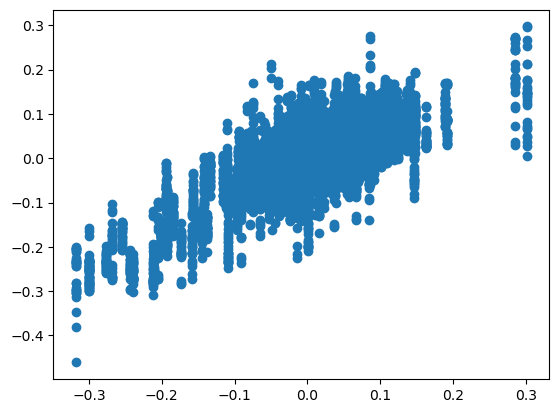

In [22]:
import matplotlib.pyplot as plt

test = anomaly_predictions.copy()
# test = test.loc[(test["variables"] == "rcf") & (test["split"] == 0)]
plt.scatter(test["log_yield"], test["oos_prediction"])

In [23]:
r2_groups = [
    "data_fold",
    "split",
    "random_state",
    "variables",
]


grouped_R2 = anomaly_predictions.groupby(r2_groups, as_index=False).apply(
    get_group_R2, "log_yield", "oos_prediction"
)
grouped_R2.rename(columns={None: "oos_R2"}, inplace=True)
grouped_R2

,data_fold,split,random_state,variables,oos_R2
0,test,0,670487,ndvi,0.010341
1,test,0,670487,ndvi_tmp,0.194082
2,test,0,670487,rcf,-0.004938
3,test,1,116739,ndvi,0.647465
4,test,1,116739,ndvi_tmp,0.654718
5,test,1,116739,rcf,0.608922
6,test,2,26225,ndvi,0.673633
7,test,2,26225,ndvi_tmp,0.670499
8,test,2,26225,rcf,0.663557
9,test,3,777572,ndvi,0.650410


In [24]:
demean_summary_r2_groups = [
    "data_fold",
    "variables",
]
grouped_R2.groupby(demean_summary_r2_groups, as_index=False).agg(
    {"oos_R2": "mean"}
).sort_values("variables")

,data_fold,variables,oos_R2
0,test,ndvi,0.507439
3,train,ndvi,0.545656
1,test,ndvi_tmp,0.532043
4,train,ndvi_tmp,0.557521
2,test,rcf,0.496935
5,train,rcf,0.518647


## Anomaly Model

### Model Selection

In [25]:
model_selection_file_pattern = str(
    here("data", "results", "2_sensor_10-splits_*_anom-True.csv")
)
model_selection_files = glob.glob(pathname=model_selection_file_pattern)
sorted(model_selection_files)

['/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-06-28_1_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-06-28_2_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-06-28_3_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-06-28_4_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-06-28_5_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-06-28_6_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-modeling/code/4_explore_results/../../data/results/2_sensor_10-splits_2023-06-29_10_rcf_climate-False_anom-True.csv',
 '/home/cmolitor/crop-mode

In [26]:
model_selection_results = task_modeling_utils.merge_files(model_selection_files)
model_selection_results = model_selection_results.dropna(axis=1, how="all")
model_selection_results

,split,random_state,variables,anomaly,country,year_range,satellite_1,bands_1,num_features_1,points_1,...,mean_of_val_R2,val_R2,val_r,val_r2,train_R2,train_r,train_r2,test_R2,test_r,test_r2
0,0,670487,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,...,"[[0.20962120884393354, 0.32375418573679704]]",0.350928,0.615195,0.378465,0.916672,0.964241,0.929761,0.314842,0.582788,0.339641
1,1,116739,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,...,"[[0.14964826236827716, 0.28861209159165735]]",0.341339,0.610577,0.372804,0.915503,0.963208,0.927770,0.281188,0.609699,0.371733
2,2,26225,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,...,"[[0.1642373513973112, 0.19659132452419187]]",0.228736,0.533863,0.285010,0.937866,0.974249,0.949161,0.556001,0.771852,0.595755
3,3,777572,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,...,"[[0.28997967568245275, 0.3625419520053873]]",0.380669,0.621001,0.385642,0.804948,0.914029,0.835449,0.309338,0.560592,0.314263
4,4,288389,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,...,"[[0.3376818293112775, 0.4178160858272063]]",0.454525,0.680078,0.462506,0.943372,0.976125,0.952821,0.177294,0.589068,0.347001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5,256787,rcf,True,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,...,"[[0.2663388308746587, 0.4101177035726672]]",0.405602,0.642290,0.412536,0.740603,0.871393,0.759326,0.431489,0.661219,0.437210
896,6,234053,rcf,True,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,...,"[[0.4313176357145322, 0.4613189019065264]]",0.473084,0.687932,0.473250,0.792304,0.901272,0.812291,0.453518,0.679583,0.461833
897,7,146316,rcf,True,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,...,"[[0.3888074388033191, 0.4495030964331378]]",0.457212,0.676577,0.457756,0.763701,0.886123,0.785213,0.401973,0.655530,0.429719
898,8,772246,rcf,True,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,4,...,"[[0.3775894990531866, 0.4570836198289194]]",0.468138,0.685936,0.470508,0.744719,0.874096,0.764044,0.370545,0.612061,0.374618


In [27]:
model_selection_group_cols = [
    "variables",
    "anomaly",
    "country",
    "year_range",
    "satellite_1",
    "bands_1",
    "num_features_1",
    "points_1",
    "month_range_1",
    "limit_months_1",
    "crop_mask_1",
    "weighted_avg_1",
    "satellite_2",
    "bands_2",
    "num_features_2",
    "points_2",
    "month_range_2",
    "limit_months_2",
    "crop_mask_2",
    "weighted_avg_2",
]

model_selection_results_summary = model_selection_results.groupby(
    model_selection_group_cols, as_index=False
).agg(
    {
        "val_R2": "mean",
        "val_r2": "mean",
        "test_R2": "mean",
        "test_r2": "mean",
    }
)
model_selection_results_summary = model_selection_results_summary.sort_values(
    "val_R2", ascending=False
)
model_selection_results_summary

,variables,anomaly,country,year_range,satellite_1,bands_1,num_features_1,points_1,month_range_1,limit_months_1,...,num_features_2,points_2,month_range_2,limit_months_2,crop_mask_2,weighted_avg_2,val_R2,val_r2,test_R2,test_r2
14,rcf,True,ZMB,2016-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,1-12,False,...,1000,4,1-12,False,True,False,0.625838,0.634117,0.694785,0.720626
46,rcf,True,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,1-12,False,...,1000,4,1-12,False,True,False,0.587637,0.601613,0.599024,0.632362
30,rcf,True,ZMB,2016-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,20,1-12,False,...,1000,4,1-12,False,True,False,0.577214,0.591571,0.573207,0.657712
54,rcf,True,ZMB,2016-2021,landsat-c2-l2,r-g-b-nir-swir16-swir22,1024,20,4-9,True,...,1000,4,1-12,False,True,False,0.575845,0.579485,0.576837,0.593267
38,rcf,True,ZMB,2016-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,20,4-9,True,...,1000,4,1-12,False,True,False,0.573925,0.580842,0.536521,0.584403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,rcf,True,ZMB,2016-2022,sentinel-2-l2a,2-3-4,1000,15,4-9,True,...,1000,4,4-9,True,True,False,0.322453,0.351643,0.204375,0.333220
10,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,4-9,True,...,1000,20,1-12,False,True,False,0.307883,0.354537,0.349738,0.425035
5,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,15,1-12,False,...,1000,20,1-12,False,True,False,0.294726,0.353522,0.140393,0.303955
13,rcf,True,ZMB,2014-2021,landsat-8-c2-l2,1-2-3-4-5-6-7,1000,20,4-9,True,...,1000,20,1-12,False,True,False,0.280281,0.297467,0.080351,0.224114


In [28]:
top_model = model_selection_results_summary.iloc[0:1, :]
top_model_dict = top_model.to_dict(orient="records")[0]
top_model_dict

{'variables': 'rcf',
 'anomaly': True,
 'country': 'ZMB',
 'year_range': '2016-2021',
 'satellite_1': 'landsat-8-c2-l2',
 'bands_1': '1-2-3-4-5-6-7',
 'num_features_1': 1000,
 'points_1': 15,
 'month_range_1': '1-12',
 'limit_months_1': False,
 'crop_mask_1': True,
 'weighted_avg_1': False,
 'satellite_2': 'sentinel-2-l2a',
 'bands_2': '2-3-4',
 'num_features_2': 1000,
 'points_2': 4,
 'month_range_2': '1-12',
 'limit_months_2': False,
 'crop_mask_2': True,
 'weighted_avg_2': False,
 'val_R2': 0.6258380146218993,
 'val_r2': 0.6341167754625727,
 'test_R2': 0.694785309391216,
 'test_r2': 0.7206264487364556}

In [29]:
f1 = "landsat-8-c2-l2_bands-1-2-3-4-5-6-7_ZMB_15k-points_1000-features_yr-2014-2021_mn-1-12_lm-False_cm-True_wa-False_summary.feather"
f2 = "sentinel-2-l2a_bands-2-3-4_ZMB_4k-points_1000-features_yr-2016-2022_mn-1-12_lm-False_cm-True_wa-False_summary.feather"